## Task - Part 2

### Step 1 - import the necessary analysis and visualization libraries, then import your most up-to-date project data

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#setting up path variables
proj_path = r'/home/nevesfernandes/20250701 Instacart Basket Analysis/'
data_path = r'/home/nevesfernandes/20250701 Instacart Basket Analysis/2 Data/'

In [3]:
#importing pickle file into working dataframe
df_ord_prod_cust = pd.read_pickle(os.path.join(data_path, '2 Prepared Data', 'orders_products_customers.pkl'))

### Step 2 - If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

Completed in the notebook called "Intro... (exercise)" also attached

### Step 3 - You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

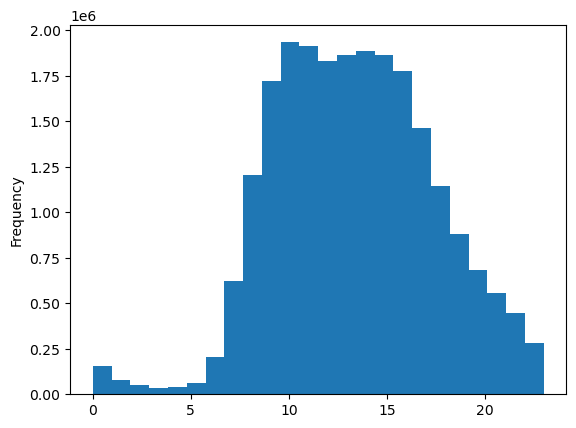

In [4]:
hist_hod = df_ord_prod_cust['order_hour_of_day'].plot.hist(bins = 24)

The histogram shows:
* very low activity during night hours (0 to 6)
* a gradual increase from 7 onwards, up to 10 a.m., where it reaches highest value (although not by far)
* remains on high values until 4 p.m., somewhere between 700000 and 800000 orders
* from 5 p.m. up to midnight it keeps steadily decreasing the amount of orders 

### Step 4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

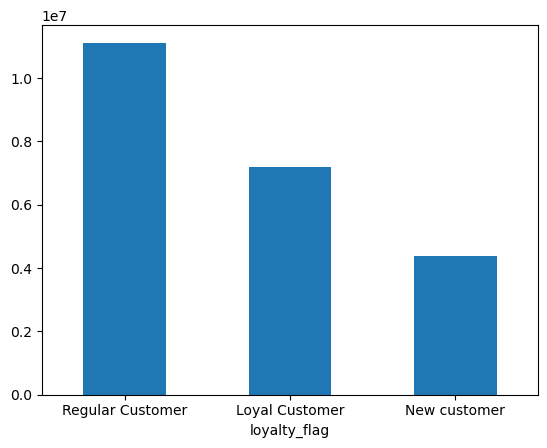

In [5]:
#re-labeling
dict_labels = {1:"New customer",2:"Regular Customer",3:"Loyal Customer"}
#plotting
bar_plot_loyalty = df_ord_prod_cust['loyalty_flag'].value_counts().rename(dict_labels).plot.bar(rot=0)

### Step 5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [6]:
#assigning to a df the fields needed. Note that I'm using already a 30% random sample
df_line_plot = df_ord_prod_cust[['order_hour_of_day','prices']]

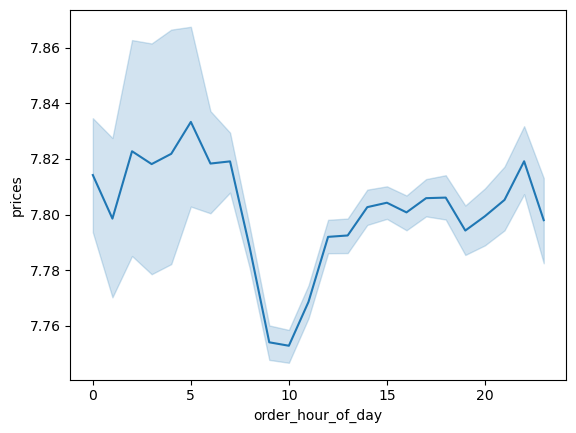

In [7]:
#creating line plot, and assigning it to a variable. Be right back xD
line_prices_hod = sns.lineplot(data = df_line_plot, x = 'order_hour_of_day',y = 'prices')

The plot is a bit misleading, because of the y-axis scale. The variabilty in average prices throughout the day is extremely small (between 7.7 and 7.9). We should remember that we have prices in a full range ]0,25]. 

On the other hand, we must keep in mind the impact of these small variations in average prices have in a huge amount of orders. Best here will be to sales volumes (not orders, not average prices, but a combination of both across the day).

### Step 6 - Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [8]:
#assigning to a df the fields needed.
df_line_plot = df_ord_prod_cust[['age','number_of_dependants']]

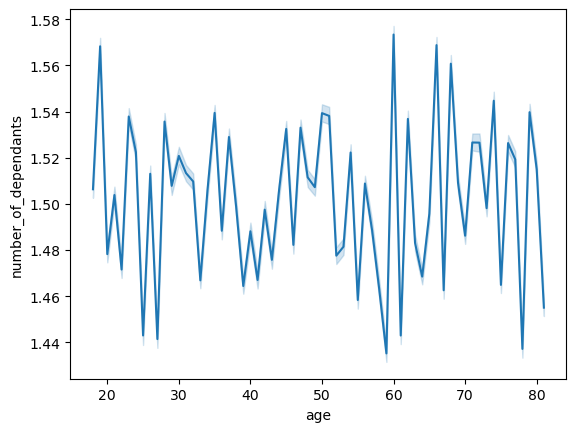

In [9]:
#creating line plot and assign it to a variable
line_age_ndep = sns.lineplot(data = df_line_plot, x = 'age',y = 'number_of_dependants')

There is no connection whatsoever between age and number of dependants. Across all ages the average number of dependants is around 1.5, with small variations, which is the average for the full population of our customers.

### Step 7 - You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

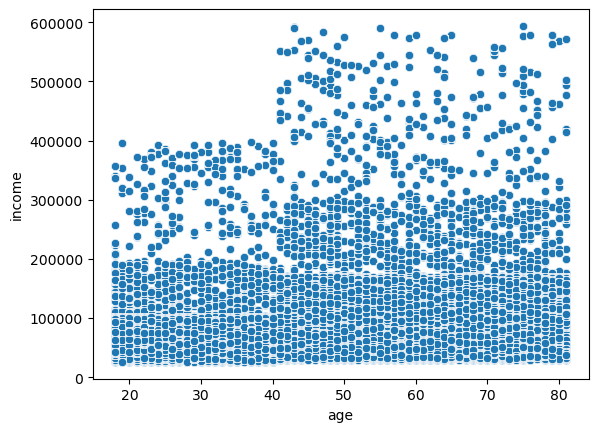

In [10]:
#draw scatterplot and assign it to a variable
sc_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_ord_prod_cust)

In the scatterplot we can identify some sort of correlation (somehow in blocks) between the variables, although it's not completely evident.
For example, below 40 y.o., there are no customers with income greater than 400k. They only show up for people older than 40. 
Also, the density of incomes between 200k and 300k is much bigger for people older than 40.

But most likely, if we compute a correlation coeficient, it will output a low value. This is where visualizations can be a great addition to math and calculations!

### Step 8 - Export your visualizations as “.png” files in your relevant project folder.

In [11]:
#exporting the various plots created
hist_hod.figure.savefig(os.path.join(proj_path, '4 Analysis','3 Visualizations', 'hist_orders_hour_of_day.png'))
bar_plot_loyalty.figure.savefig(os.path.join(proj_path, '4 Analysis','3 Visualizations', 'bar_plot_loyalty.png'))
line_prices_hod.figure.savefig(os.path.join(proj_path, '4 Analysis','3 Visualizations', 'line_prices_hour_of_day.png'))
line_age_ndep.figure.savefig(os.path.join(proj_path, '4 Analysis','3 Visualizations', 'line_age_num_dependants.png'))
sc_age_income.figure.savefig(os.path.join(proj_path, '4 Analysis','3 Visualizations', 'scatter_age_income.png'))
